In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# This line lets us plot on our ipython notebook
%matplotlib inline

In [3]:
filepath="data/Hourly Flows/Rn_OD_0-1.txt"
merge_cname="Flow"
list_cnames=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow']
def df_merge_24(filepath,merge_cname,list_cnames):
    dict_df_024={}
    for i in range(24):
        filepath=filepath[:23]+str(i)+"-"+str(i+1)+".txt"
        dict_df_024["df_"+str(i)+str(i+1)]=pd.read_csv(filepath, header=None, names=list_cnames)
    df_final=dict_df_024['df_01']
    for j in range(24):
        df_final=df_final.join(dict_df_024["df_"+str(j)+str(j+1)][merge_cname], rsuffix=str(j)+str(j+1))
    return df_final
df_final[:10]

NameError: name 'df_final' is not defined

In [13]:
left=pd.DataFrame({'asdb'+str(1): [1,2,3], 
                   'fgsd'+str(3)+'-'+str(0): [5,6,7]}, 
                  index=['mean', 'min','max'])
left

,asdb1,fgsd3-0
mean,1,5
min,2,6
max,3,7


In [8]:
np.max(left['asdb1'])

3

In [9]:
np.min(left['asdb1'])

1

In [11]:
np.median(left['asdb1'])

2.0

In [16]:
new_df=left.set_index(['a','b','c'])

KeyError: 'a'

In [22]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3'], 'key': ['K0', 'K1', 'K0', 'K1']})
print left
right = pd.DataFrame({'C': ['C0', 'C1'], 'D': ['D0', 'D1']}, index=['K0', 'K1'])
print right
result = right.join(left, on='C')
result

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K0
3  A3  B3  K1
     C   D
K0  C0  D0
K1  C1  D1


,C,D,A,B,key
K0,C0,D0,NaN,NaN,NaN
K1,C1,D1,NaN,NaN,NaN


In [23]:
np.random.rand(50)

array([ 0.05357669,  0.72094205,  0.83501585,  0.10764241,  0.53913828,
        0.48745723,  0.2917016 ,  0.9877801 ,  0.50323457,  0.47972018,
        0.34004405,  0.26546426,  0.74959289,  0.6755296 ,  0.4304181 ,
        0.98816707,  0.8399705 ,  0.19516751,  0.25131368,  0.28070139,
        0.18908379,  0.08251959,  0.08231392,  0.64000826,  0.11939613,
        0.50687957,  0.74825585,  0.39970514,  0.71335555,  0.64698791,
        0.67902544,  0.00665964,  0.57996446,  0.63600538,  0.98802458,
        0.83713328,  0.52932432,  0.29740282,  0.21937308,  0.25257795,
        0.85658849,  0.58691457,  0.96220987,  0.31924177,  0.99784604,
        0.25570882,  0.12185493,  0.60731219,  0.19081028,  0.98112496])

In [26]:
a=np.random.rand(10, 10)
a

array([[ 0.07111884,  0.51123595,  0.92478835,  0.03143372,  0.23601068,
         0.18909572,  0.0142541 ,  0.2062184 ,  0.68647819,  0.7790496 ],
       [ 0.22194869,  0.61176181,  0.68228933,  0.1888795 ,  0.84555917,
         0.38951243,  0.71526139,  0.73273289,  0.75439378,  0.33930615],
       [ 0.27355966,  0.0887718 ,  0.98541119,  0.60261218,  0.52019905,
         0.73995084,  0.74805105,  0.09801749,  0.0888561 ,  0.02674885],
       [ 0.8810465 ,  0.38053871,  0.02551807,  0.67072128,  0.91092618,
         0.57515319,  0.76654601,  0.2299512 ,  0.24030651,  0.54451296],
       [ 0.06109088,  0.60865803,  0.00181741,  0.85547379,  0.69553835,
         0.01189096,  0.74821378,  0.73749909,  0.12391539,  0.96180137],
       [ 0.16756366,  0.0220629 ,  0.61508027,  0.56582279,  0.98222124,
         0.93578066,  0.86591028,  0.53704452,  0.87424421,  0.37195279],
       [ 0.37737602,  0.61772821,  0.26861669,  0.69045801,  0.08363796,
         0.3680268 ,  0.99548946,  0.51396169

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [31]:
def array2cmap(X):
    N = X.shape[0]

    r = np.linspace(0., 1., N+1)
    r = np.sort(np.concatenate((r, r)))[1:-1]

    rd = np.concatenate([[X[i, 0], X[i, 0]] for i in xrange(N)])
    gr = np.concatenate([[X[i, 1], X[i, 1]] for i in xrange(N)])
    bl = np.concatenate([[X[i, 2], X[i, 2]] for i in xrange(N)])

    rd = tuple([(r[i], rd[i], rd[i]) for i in xrange(2 * N)])
    gr = tuple([(r[i], gr[i], gr[i]) for i in xrange(2 * N)])
    bl = tuple([(r[i], bl[i], bl[i]) for i in xrange(2 * N)])


    cdict = {'red': rd, 'green': gr, 'blue': bl}
    return colors.LinearSegmentedColormap('my_colormap', cdict, N)
#-----------------------------------------
if __name__ == "__main__":

    #define the colormar
    X = np.array([[0., 1., 0.],  #green
                  [0., 0., 1.],  #blue
                  [1., 1., 0.],  #yellow
                  [1., 0., 0.]]) #red
    mycmap = array2cmap(X)

    values = np.random.rand(10, 10)
    plt.gca().pcolormesh(values, cmap=mycmap)

    cb = plt.cm.ScalarMappable(norm=None, cmap=mycmap)
    cb.set_array(values)
    cb.set_clim((0., 1.))
    plt.gcf().colorbar(cb)
    plt.show()

NameError: global name 'colors' is not defined

In [33]:
X = np.array([[0., 1., 0.],  #green
                  [0., 0., 1.],  #blue
                  [1., 1., 0.],  #yellow
                  [1., 0., 0.]]) #red
N = X.shape[1]
N

3L

In [34]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

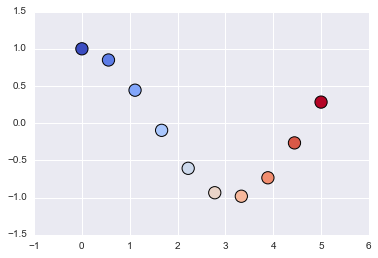

In [41]:
x=np.linspace(0,5,10)
y=np.cos(x)

t = np.linspace(0, 1, 10)
colors=plt.cm.coolwarm(t)

#plt.scatter(OD_location['Longitude'],OD_location['Latitude'], s=np.log(OD_location['flow'])*100)
plt.scatter(x, y, s=150, linewidths=1, c=colors)